In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2022-10-04 13:12:13
MODIFIED: 2022-10-06 10:48:45
"""

# -*- coding:utf-8 -*-
import sys
sys.path.append('../acllite')
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource
from processes import preprocessing, construct_image_info, post_process, get_model_info
import acl, cv2, struct, time, os
import numpy as np
from PIL import Image, ImageDraw
from IPython import display

In [2]:
img_path = "./data/dog.jpg"

model_path = "/home/altemur/acllite_update/models/yolov3_caffe/yolov3.om"

acl_resource = AclLiteResource()
acl_resource.init()

model = AclLiteModel(model_path, 0)

init resource stage:
Init resource success
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 24576
malloc output 1, size 32
Create model output dataset success
Init model resource success


In [3]:
get_model_info(model)

	Input Dimensions
Name: data
Dimensions: [1, 416, 416, 3]
---------------------------------
Name: img_info
Dimensions: [1, 4]
---------------------------------


	Output Dimensions
Name: detection_out3:0:box_out
Dimensions: [1, 6144]
---------------------------------
Name: detection_out3:1:box_out_num
Dimensions: [1, 8]
---------------------------------


In [4]:
img_org_bgr = cv2.imread(img_path)

data = preprocessing(img_org_bgr,model._model_desc)

%timeit -n 10 -r 3

result_list = model.execute([data, construct_image_info()]) # ??? [ 416.  416.  900. 1352.], size:4 ???

img_resized shape (416, 416, 3)


In [5]:
image_output = post_process(result_list, cv2.imread(img_path), img_path)

post process
image shape = (1233, 1200, 3)
scalex : 2.8846153846153846
scaley : 2.9639423076923075
output path: ./out/dog.jpg
image file =  ./data/dog.jpg
box_num: 3
 person: class  0, box  258  38  466  749, score  0.996094
 car: class  2, box  452  256  618  323, score  0.974609
 dog: class  16, box  500  445  909  844, score  1.000000
output:./out/out_dog.jpg
success!


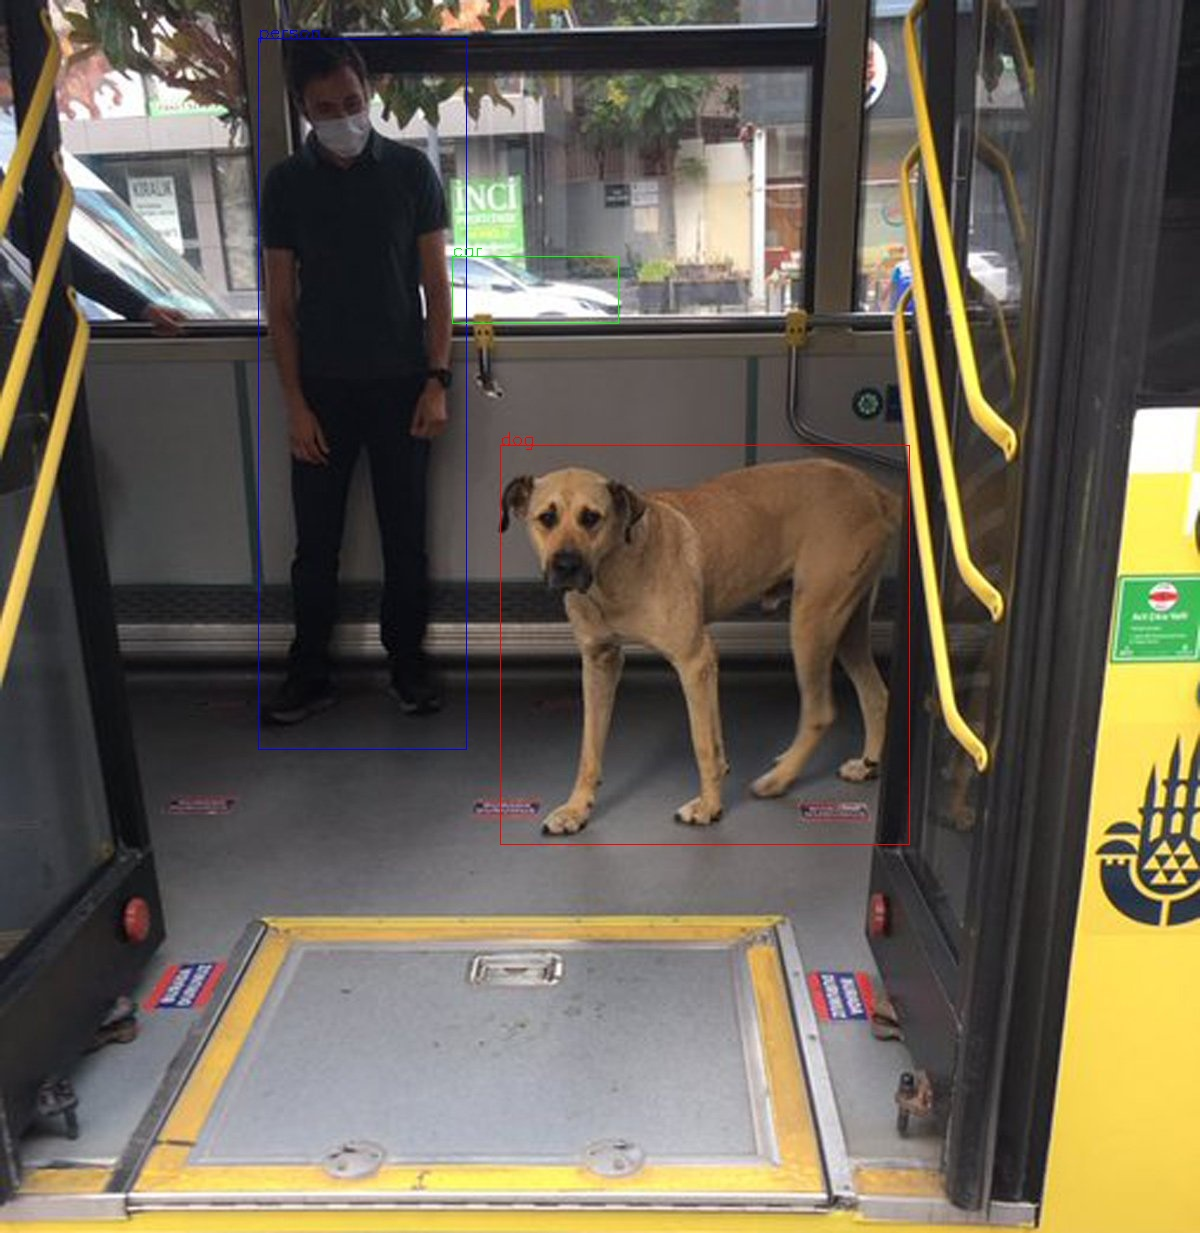

In [6]:
display.Image('./out/out_dog.jpg')